## 实验：黑白图像轮廓检测

### 实验概要

#### OSTU 算法（大津法）

在前面的实验中，我们使用 OSTU 算法实现彩色图像的二值化。在计算机视觉和图像处理中，大津二值化法用来自动对基于聚类的图像（灰度图像）进行二值化。该算法以 `大津展之` (Nobuyuki Otsu) 命名。算法假设图像像素能够根据阈值，被分成背景 `background` 和目标 `objects` 两部分。然后，计算该最佳阈值来区分这两类像素，使得两类像素区分度最大。

在之前的实验中，我们已经了解到，在 OpenCV 中使用 Python 应用 OSTU 算法，只需要在 `cv2.threshold` 命令中采用 `cv2.THRESH_OTSU` 参数即可实现：

```python
ret,binary_im = cv2.threshold(gray_image,0,255,cv2.THRESH_OTSU) 
```

### 实验目标

在前面的实验中，您在彩色图像上绘制了轮廓。下一个任务，是在黑白图像上，用蓝色 (BGR 代码: `255,0,0`) 绘制检测到的轮廓:

<img src="./img/6.jfif" width="50%">

### 1. 导入依赖库

In [1]:
import cv2                        # 导入OpenCV
import matplotlib.pyplot as plt   # 导入matplotlib

# 魔法指令，使图像直接在Notebook中显示
%matplotlib inline

### 2. 加载并显示图像

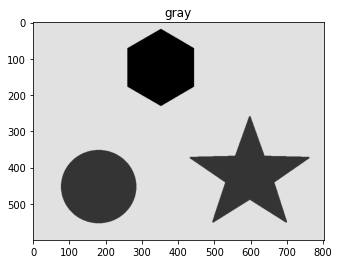

In [2]:
# 设置输入输出路径
import os
base_path = os.environ.get("BASE_PATH",'../data/')
data_path = os.path.join(base_path + "lab4/")
result_path = "result/"
os.makedirs(result_path, exist_ok=True)

# 读取图像文件
image = cv2.imread('./data/sample shapes.png')          
# 将图像转换为灰度 
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)    

# 在云实验环境下忽略以下代码，避免程序尝试打开系统窗口显示图片；
# 使用matplotlib替换，使图像直接在 Jupyter Notebook 中输出。

# cv2.imshow( 'gray' , gray_image ) 
# cv2.waitKey(0) 
# cv2.destroyAllWindows()

plt.imshow(gray_image,cmap="gray") # 使用matplotlib将图像喷绘成灰色
plt.title('gray')            # 指定输出图像的标题
plt.show()                         # 显示图像

### 3. 图像二值化

将图像转换为二值图像。使用 Otsu 算法进行分割。如果 Otsu 的方法在您的图像上效果不佳，那么您可以选择固定的阈值实现（参考实验：图像二值化）。

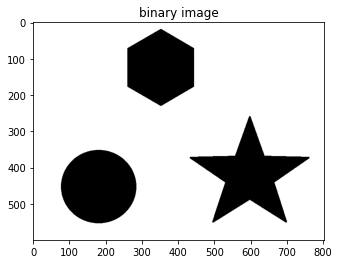

In [3]:
ret,binary_im = cv2.threshold(gray_image,0,255,cv2.THRESH_OTSU) 

# 在云实验环境下忽略以下代码，避免程序尝试打开系统窗口显示图片；
# 使用matplotlib替换，使图像直接在 Jupyter Notebook 中输出。

# cv2.imshow( 'binary image' , binary_im )
# cv2.waitKey(0) 
# cv2.destroyAllWindows()

plt.imshow(binary_im,cmap="gray")     # 使用matplotlib将图像喷绘成灰色
plt.title('binary image')             # 指定输出图像的标题
plt.show()                            # 显示图像

### 4. 图像反转

In [4]:
# 通过反转图像运算符 ~ 快速实现前后景黑白颜色的反转
inverted_binary_im= ~binary_im                  

### 5. 轮廓检测

In [5]:
# 执行轮廓检测，涵盖轮廓整个家族
# 同时，仅保存那些必须绘制轮廓点的坐标，节省内存
contours,hierarchy = cv2.findContours(inverted_binary_im,
                                cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) 

### 6. 轮廓绘制

要使用 BGR 颜色代码绘制轮廓，图像必须具有三个通道。因此，我们将复制二值图像的单个平面三次，然后合并三个平面以将其扩展到 BGR 色彩空间。

注意：这里与前面的实验不一样的是：

- 在之前的实验中二值图像仅用于轮廓检测，之后是在原始 BGR 图像 `image` 上绘制轮廓；
- 而本实验是直接将轮廓绘制在用于轮廓检测的二值图像 `inverted_binary_im `之上。由于二值图像仅有一个平面，因此，需要通过 `cv2.merge` 命令，将相同的三个平面合并为一幅完整的三通道 BGR 图像 `bgr`。

In [6]:
# 将相同的三个平面合并为一幅完整的三通道BGR图像
# 之后将检测到的轮廓绘制在合并后的BGR图像brg上面
bgr = cv2.merge([inverted_binary_im, inverted_binary_im, inverted_binary_im]);

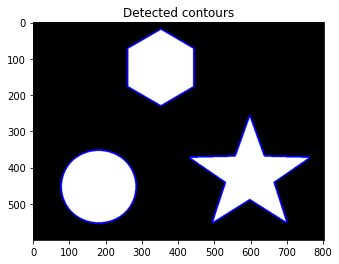

In [7]:
# 在图像 bgr 上标记所有检测到的轮廓，用蓝色（255,0,0） 绘制，将厚度设置为 3:
with_contours = cv2.drawContours(bgr, contours, -1,(255,0, 0),3) 

# 在云实验环境下忽略以下代码，避免程序尝试打开系统窗口显示图片；
# 使用matplotlib替换，使图像直接在 Jupyter Notebook 中输出。

# cv2.imshow( 'Detected contours' , with_contours )
# cv2.waitKey(0) 
# cv2.destroyAllWindows()

plt.imshow(with_contours[:,:,::-1])          # 使用matplotlib将图像转换为RGB
plt.title('Detected contours')               # 指定输出图像的标题
plt.show()                                   # 显示图像

### 实验小结

在本实验中，我们看到了如何在黑白图像上绘制轮廓。二值图像只有一个平面，而彩色轮廓只能在具有三个平面的图像上绘制。因此，我们将复制二值图像以获得三个相同的图像（平面）。之后，将这些平面合并以获得 BGR 格式的图像。此后，使用 BGR 颜色编码，在其上绘制检测到的轮廓。